*   Student name: **[Aseem Sharma]**
*   Student Panther ID: **[6329681]** 
*   Collaborator(s): **[Michael Cordero]**
*   **Notice on Academic Misconduct**: Sharing your codes with other students is also an academic misconduct. If your submission is found unsually similar to that of another student, you will be reported to the SCAI as a potential academic misconduct case, regardless of your reasons. Violations may lead to suspension or expulsion from the university.

# CAP5602 Homework 2 (15% total grade)

## **Deadline: 10/3/2022 11:59 PM**

In this homework, we will train, test, and visualize the K-NN and decision tree models on a simple 1d regression dataset.

## 1. Generate dataset (2% total grade)

Write Python code to generate a regression dataset that contains 250 examples. In this dataset, each input $x$ is drawn uniformly random from (0, 2) and the corresponding output is $y = x^3 - 3x^2 + 2x + \epsilon$, where $\epsilon$ is Gaussian noise with zero mean and standard deviation 0.04.

You don't need to define a function, but your code should create variables that contain all the inputs and outputs. You should also fix a random seed so that your results are reproducible.

In [ ]:
import numpy as np

np.random.seed(0)

n_samples = 250

x = np.sort(2 * np.random.rand(n_samples, 1), axis=0)

y = x**3 - 3*x**2 + 2*x + np.random.normal(loc = 0, scale = 0.04, size =(n_samples, 1))

print(x.shape)
print(y.shape)
print(x[:5])
print(y[:5])


# PREVIOUS ATTEMPTS

# y = np.apply_along_axis(lambda k: sum(k**3 - 3*k**2 + 2*k + np.random.normal(loc = 0, scale = 0.04, size =(n_samples, 1))), axis = 1, arr = x)
# y_eq = np.apply_along_axis(lambda k: sum(k**3 - 3*k**2 + 2*k), axis=1,arr=x)   


# def y_eq(X):
#   return ((X**3) - (3*(X**2)) + (2*X) + np.random.normal(loc = 0,scale=0.04, size=(n_samples, 1)))


# Y = np.apply_along_axis(y_eq, axis = 1, arr = X)

(250, 1)
(250, 1)
[[0.00939095]
 [0.02342817]
 [0.03704359]
 [0.0375796 ]
 [0.0383864 ]]
[[0.03944923]
 [0.03836071]
 [0.10089295]
 [0.10391576]
 [0.15893825]]


## 2. Split dataset into train/test sets (1% total grade)

Write code to randomly split your dataset above into a train set and a test set. Your train set should contain 150 examples and your test set should contain 100 examples.

(150, 1) (100, 1)


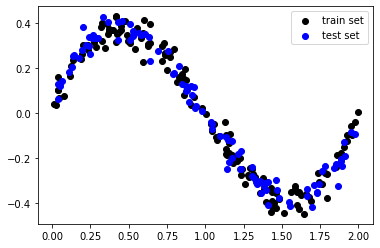

In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=100, train_size=150, random_state=42)
print(X_train.shape, x_test.shape)

import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color = 'black', label = 'train set')
plt.scatter(x_test, y_test, color = 'blue', label = 'test set')
plt.legend()
plt.show()

## 3. Define a K-NN model (1% total grade)

Write code to define a K-NN regression model with K=5 and the neighbors are weighted by the inverse of their distance.

In [ ]:
from sklearn import neighbors

n_neighbors = 5
weight_func = 'distance'

knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weight_func)

## 4. Train your K-NN model (1% total grade)

Write code to train your K-NN model on your train set.

In [ ]:
# Write your code here
knn.fit(X_train, Y_train)


KNeighborsRegressor(weights='distance')

## 5. Make prediction with your K-NN model (1% total grade)

Write code to predict the outputs of your K-NN model on the test set.

In [ ]:
# Write your code here
Y_pred = knn.predict(x_test)

print(Y_pred[:5])

[[-0.13652767]
 [ 0.09889714]
 [ 0.25868563]
 [ 0.37834699]
 [ 0.09986102]]


## 6. Compute the MSE (1% total grade)

Write code to compute and print out the mean squared error (MSE) of your K-NN model on the test set

In [ ]:
# Write your code here
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, Y_pred)

print(mse)

0.001983013734945269


## 7. Visualize your K-NN model (2% total grade)

Write code to plot the predictions of your K-NN model on [0, 2]. You should generate 100 evenly-spaced points on [0, 2], use your K-NN model to predict their outputs, and plot them as a line graph. Your plot must also contain the train set, the test set, and the legend. Play with the settings to make your plot clear and readable.

<function matplotlib.pyplot.show(*args, **kw)>

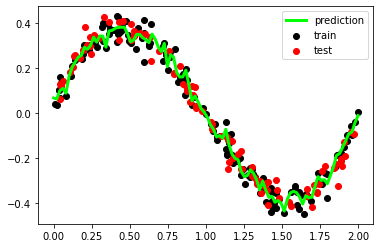

In [ ]:
xx = np.linspace(0, 2, 100).reshape(-1,1)

yy = knn.predict(xx)

plt.plot(xx, yy, color = 'lime', label = 'prediction', linewidth = 3)

plt.scatter(X_train, Y_train,color='black', label='train')

plt.scatter(x_test, y_test, color='red', label='test')

plt.legend()

plt.show

## 8. Train and test a decision tree model (2% total grade)

Write code to train a decision tree model on your train set above and then print out its MSE on the test set. Use sklearn's default setting for your model.

In [ ]:
from sklearn import tree

Tmodel = tree.DecisionTreeRegressor()
Tmodel.fit(X_train, Y_train)

Tree_pred = Tmodel.predict(x_test)
mse1 = mean_squared_error(y_test, Tree_pred)

print(mse1)

0.0023598813082206472


## 9. Visualize your decision tree model (2% total grade)

Repeat Question 7 with your trained decision tree model. Your code should generate a plot similar to that of Question 7. **Do not** plot the actual tree with graphviz.

<function matplotlib.pyplot.show(*args, **kw)>

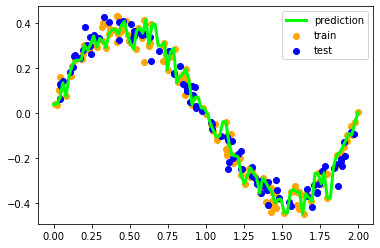

In [ ]:
xx1 = np.linspace(0, 2, 100).reshape(-1,1)

yy1 = Tmodel.predict(xx1)

plt.plot(xx1, yy1, color = 'lime', label = 'prediction', linewidth = 3)

plt.scatter(X_train, Y_train,color='orange', label='train')

plt.scatter(x_test, y_test, color='blue', label='test')

plt.legend()

plt.show

## 10. Compare decision tree and K-NN (2% total grade)

According to the above results, which model is better on your dataset (K-NN or decision tree)? Why?

**Your answer**: As from the graph below we see that K nearest neighbors has better prediction line since it is less scattered. Few properties of both the algorithms are that both are non parametric and data distribution cannot be defined in a few parameters.

Although, in the case of our dataset we see that the metric for evaluation which is Mean Square Error for KNN is close to the the square of the standard deviation of the noise than the MSE for Decision Tree, which turns out to be $0.04^2 = 0.016$. Therefore, making KNN a more well trained model than decision tree.

MSE for KNN: 0.001983013734945269

MSE for Decision Tree: 0.0023598813082206472

In my opinion KNN is better than Decision Tree

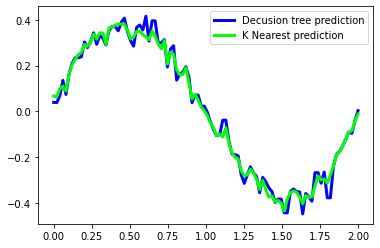

In [ ]:
def Dec_Tree():
  xx1 = np.linspace(0, 2, 100).reshape(-1,1)

  yy1 = Tmodel.predict(xx1)

  plt.plot(xx1, yy1, color = 'blue', label = 'Decusion tree prediction', linewidth = 3)

  # plt.scatter(X_train, Y_train,color='black', label='train')

  # plt.scatter(x_test, y_test, color='red', label='test')

  plt.legend()

  plt.show

def KNeigh():
  xx = np.linspace(0, 2, 100).reshape(-1,1)

  yy = knn.predict(xx)

  plt.plot(xx, yy, color = 'lime', label = 'K Nearest prediction', linewidth = 3)

  # plt.scatter(X_train, Y_train,color='black', label='train')  

  # plt.scatter(x_test, y_test, color='red', label='test')

  plt.legend()

  plt.show

Dec_Tree()
KNeigh()
